# Sentiment Analysis 

# Using Twitter Analysis dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')
df1

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
df2

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


# Shape of the dataset

In [5]:
print(df1.shape)
print(df2.shape)

(31962, 3)
(17197, 2)


# Checking for missing values

In [6]:
df1.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
df2.isnull().sum()

id       0
tweet    0
dtype: int64

In [8]:
df1[df1['label'] == 1]

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."


In [9]:
df1[df1['label'] == 0]

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...


# Count of positive and negative sentiments

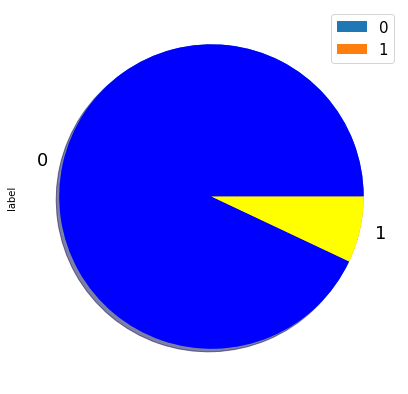

In [10]:
df1['label'].value_counts().plot.pie(figsize = (8,7),ylabel='label',textprops={'fontsize':18})
sizes=df1['label'].value_counts()
colors=['blue','yellow']
labels=[0,1]
patches, texts = plt.pie(sizes, colors=colors, shadow=True)
plt.legend(patches, labels, loc="best")
plt.legend(loc=1, prop={'size':15})
plt.show()

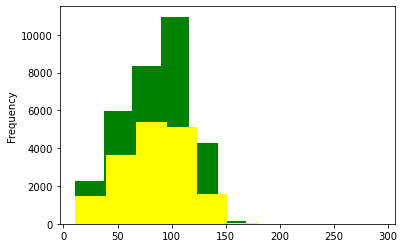

In [11]:
train =df1['tweet'].str.len().plot.hist(color = 'green', figsize = (6, 4))
test =df2['tweet'].str.len().plot.hist(color = 'yellow', figsize=(6,4))

In [12]:
df1['len'] = df1['tweet'].str.len()
df2['len'] = df2['tweet'].str.len()

df1.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [13]:
df1.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

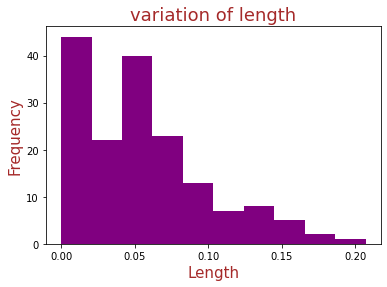

In [14]:
df1.groupby('len').mean()['label'].plot.hist(color = 'purple', figsize = (6, 4))
plt.title('variation of length',size=18,color='brown')
plt.xlabel('Length',size=15,color='brown')
plt.ylabel('Frequency',size=15,color='brown')
plt.show()


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

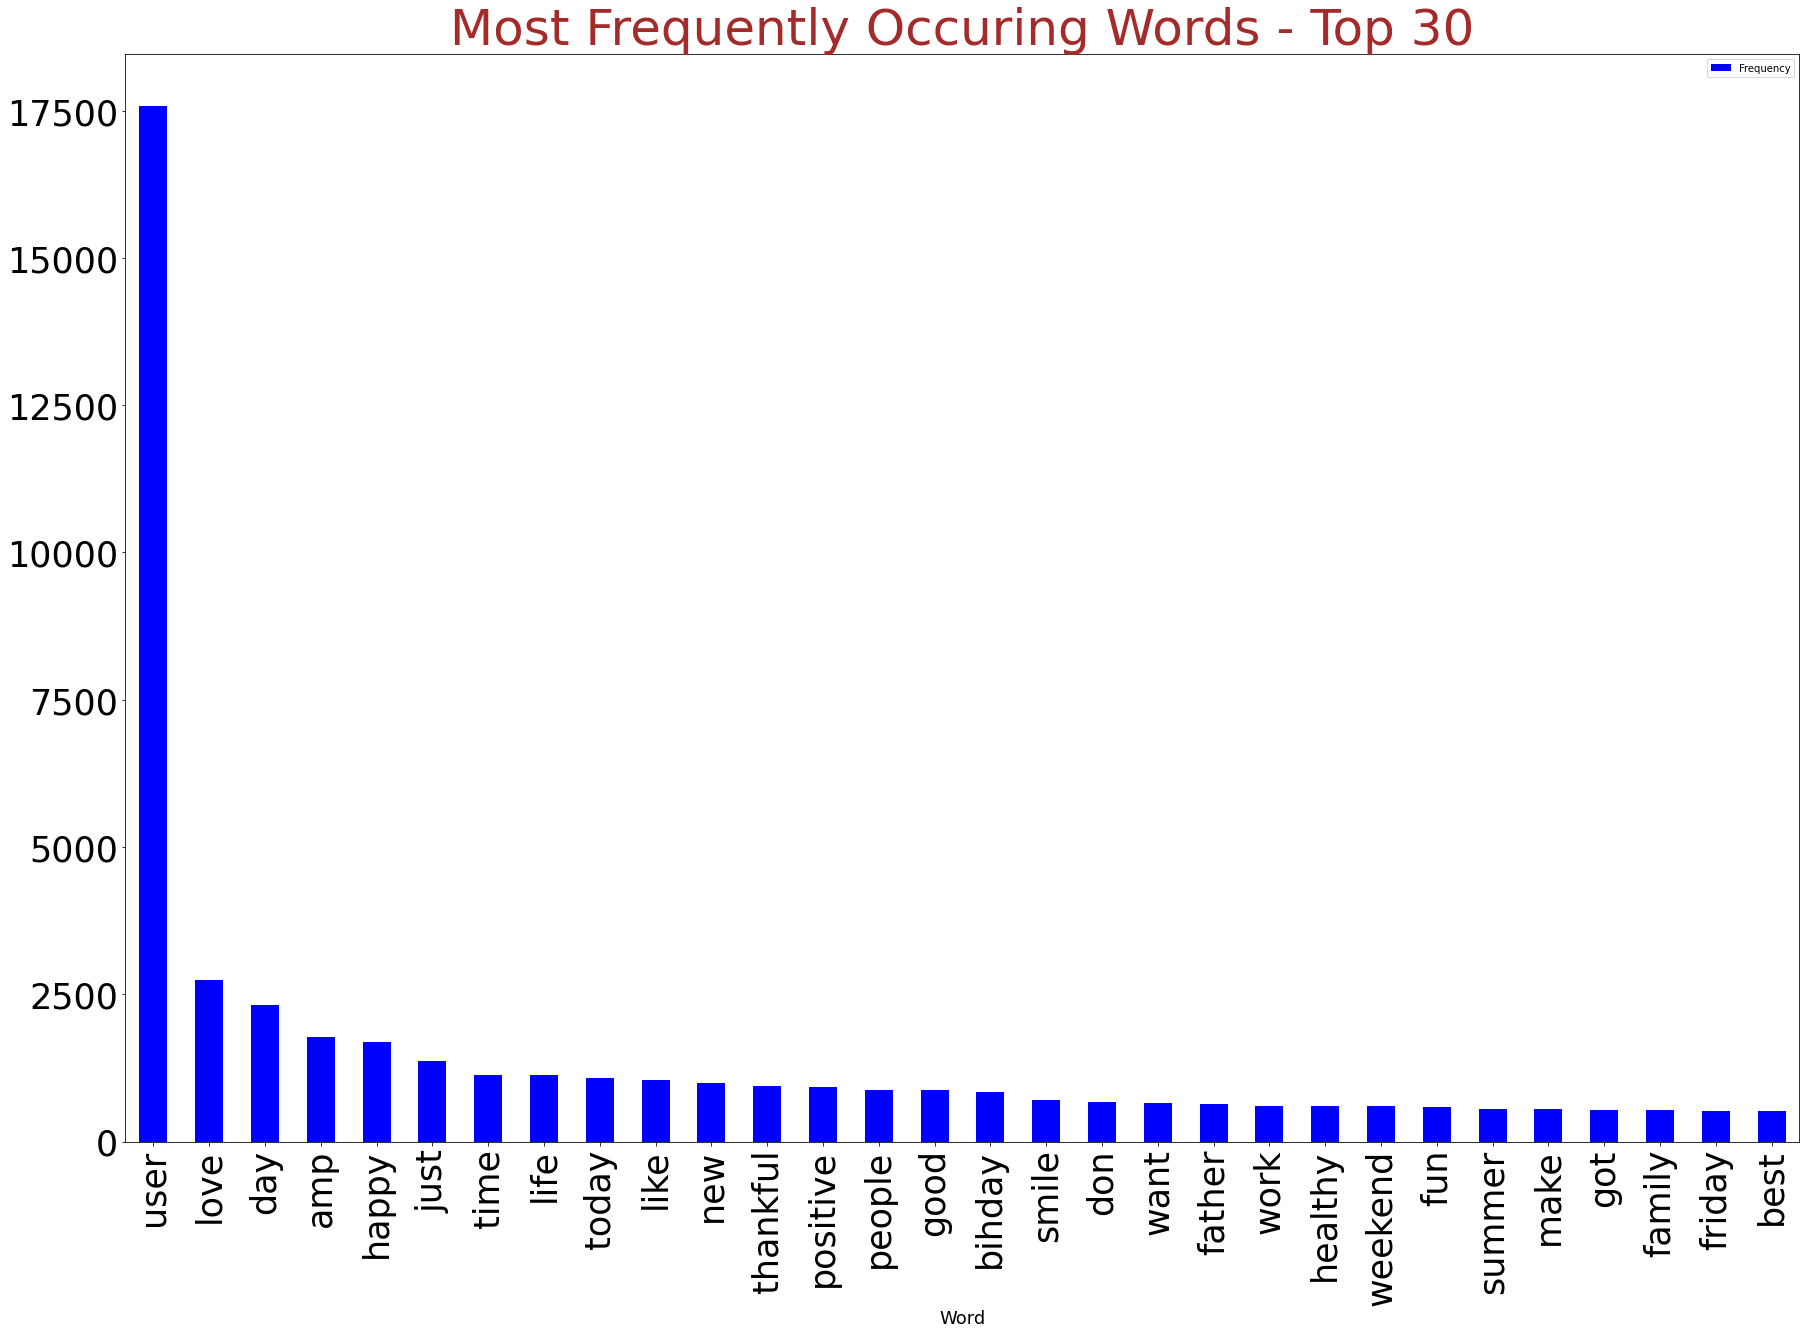

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df1.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])

frequency.head(30).plot(x='Word', y='Frequency', kind='bar', figsize=(30,20), color = 'blue')
plt.xlabel('Word',size=18)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.title("Most Frequently Occuring Words - Top 30",size=50,color='brown')

In [16]:
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [17]:
HT_regular = hashtag_extract(df1['tweet'][df1['label'] == 0])
HT_negative = hashtag_extract(df1['tweet'][df1['label'] == 1])

HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

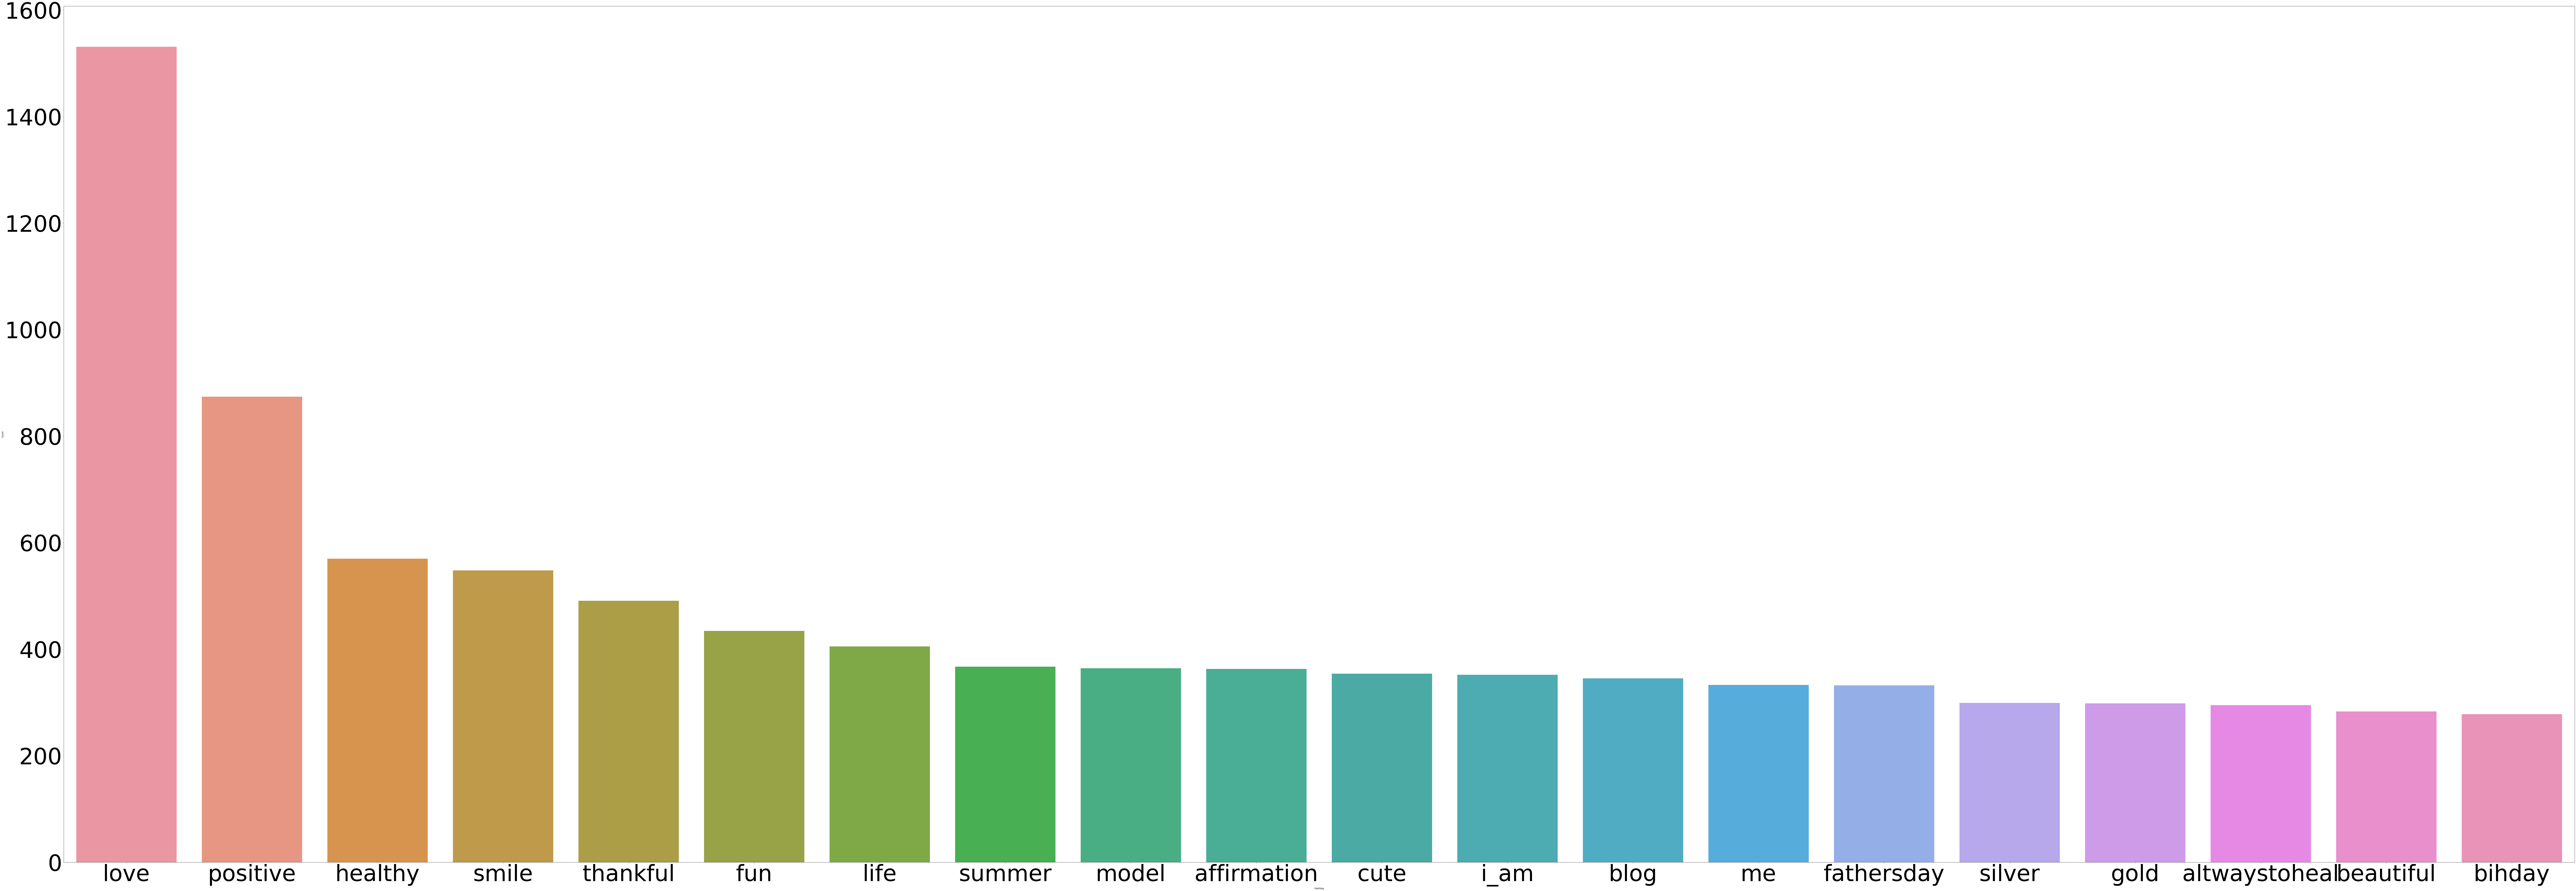

In [18]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(200,70))
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

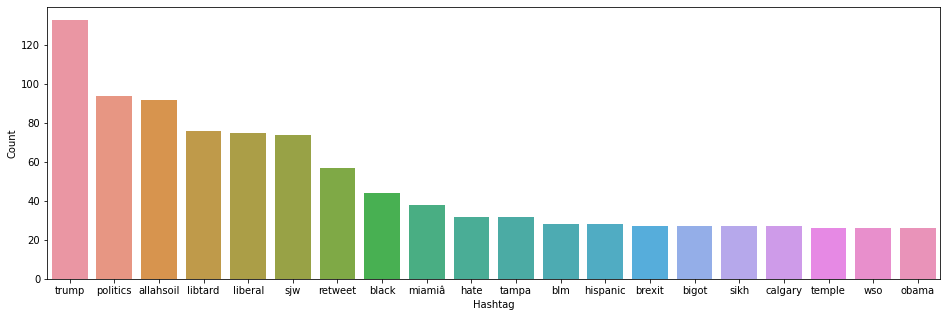

In [19]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [20]:
tokenized_tweet = df1['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(tokenized_tweet,window=5,min_count=2,sg = 1,hs = 0,negative = 10,workers= 2,seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(df1['tweet']), epochs=20)

(6109793, 8411580)

In [21]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.712334156036377),
 ('#prosecco', 0.6647494435310364),
 ('#wanderlust', 0.6356450915336609),
 ('#restaurant', 0.6299675107002258),
 ('#boardgames', 0.6282005906105042),
 ('willow', 0.621557891368866),
 ('later!', 0.6192967295646667),
 ('bay.', 0.6176908016204834),
 ('coaching', 0.6150768399238586),
 ('#marbs', 0.6147120594978333)]

In [23]:
model_w2v.wv.most_similar(positive = "cancer")

[('lost!', 0.7612658143043518),
 ('#merica', 0.7559875845909119),
 ('ownership', 0.7485781311988831),
 ('acknowledge', 0.7439286112785339),
 ('aol', 0.7413353323936462),
 ('tolerance', 0.7403268218040466),
 ('britain', 0.7380988001823425),
 ('law.', 0.7366684079170227),
 ('harassment', 0.7344716191291809),
 ('ways.', 0.7338496446609497)]

In [24]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7634478211402893),
 ('mytraining', 0.7552697658538818),
 ('training"', 0.7370936274528503),
 ('app', 0.690313994884491),
 ('app,', 0.6851914525032043),
 ('"my', 0.645313560962677),
 ('humans.', 0.6279155611991882),
 ('heroku', 0.6243561506271362),
 ('ð\x9f\x8eµð\x9f\x8e¶', 0.6239315867424011),
 ('#expressjs', 0.6238348484039307)]

In [25]:
model_w2v.wv.most_similar(negative = "hate")

[('â\x9c\x88ï¸\x8f', 0.07824615389108658),
 ('ð\x9f\x8d»', 0.030281702056527138),
 ('ma', 0.01977059245109558),
 ('#bus', 0.017096558585762978),
 ('#spain', 0.013550704345107079),
 ('#hungry', 0.012271211482584476),
 ('#comeonengland', 0.008741676807403564),
 ('#community', 0.00858873501420021),
 ('ð\x9f\x92\x8b', -8.780234929872677e-05),
 ('#findingdory', -0.004489995073527098)]

In [4]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [1]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91818\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
df1=pd.read_csv('train.csv')
train_corpus = []
for i in range(0, 31962):
    review = re.sub('[^a-zA-Z]', ' ',df1['tweet'][i])
    review = review.lower()
    review = review.split()
  
    ps = PorterStemmer()
  
  # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
    review = ' '.join(review)
    train_corpus.append(review)

In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
df2=pd.read_csv('test.csv')
test_corpus = []
for i in range(0, 17197):
    review = re.sub('[^a-zA-Z]', ' ', df2['tweet'][i])
    review = review.lower()
    review = review.split()
  
    ps = PorterStemmer()
  
  # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
    review = ' '.join(review)
    test_corpus.append(review)

In [4]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = df1.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.999123941429227
Validation Accuracy : 0.9511950944812915
F1 score : 0.5987654320987654
[[7310  122]
 [ 268  291]]


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

C:\Users\91818\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9311725691402828
f1 score : 0.5307167235494881
[[7130  302]
 [ 248  311]]
